## Netflix Data Analysis & Visualization Using Python

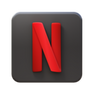Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages. Netflix was
founded by Marc Randolph and Reed Hastings on August 29, 1997, in Scotts Valley, California.


### Problem Statement

Analyze the Netflix dataset to gain insights into its content catalog and user engagement patterns. Identify trends, preferences, and potential areas for improvement in content offerings and platform performance.

In [ ]:
# importing the elated libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1 = pd.read_csv('/content/netflix.csv')
data1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Data Exploration

In [ ]:
print('The number of rows in the dataset is: ', data1.shape[0])
print('The number of columns in the dataset is: ', data1.shape[1])

The number of rows in the dataset is:  8807
The number of columns in the dataset is:  12


The data consists of **`8807`** rows and **`12`** columns. Let's explore the dataset.

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
print(data1.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


There are some missing values in the dataset, it needs to be addressed and cleaned before doing the data visuallisation to the dataset.

In [ ]:
print(data1.nunique())

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


From the given unique values in each column, we find that the director, cast, country have unique values less than the total titles.

### Imputing missing values

In [ ]:
data1['director'] = data1['director'].fillna('Unknown')
data1['cast'] = data1['cast'].fillna('Unknown')
data1['country'] = data1['country'].fillna('Unknown')

In [ ]:
print(data1.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


### Dropping the remaining data from the dataset

In [ ]:
data1 = data1.dropna()
data1.shape

(8790, 12)

In [ ]:
list(data1['director'])

['Kirsten Johnson',
 'Unknown',
 'Julien Leclercq',
 'Unknown',
 'Unknown',
 'Mike Flanagan',
 'Robert Cullen, José Luis Ucha',
 'Haile Gerima',
 'Andy Devonshire',
 'Theodore Melfi',
 'Unknown',
 'Kongkiat Komesiri',
 'Christian Schwochow',
 'Bruno Garotti',
 'Unknown',
 'Unknown',
 'Pedro de Echave García, Pablo Azorín Williams',
 'Unknown',
 'Adam Salky',
 'Unknown',
 'Olivier Megaton',
 'Unknown',
 'K.S. Ravikumar',
 'Alex Woo, Stanley Moore',
 'S. Shankar',
 'Unknown',
 'Rajiv Menon',
 'Dennis Dugan',
 'Scott Stewart',
 'Robert Luketic',
 'Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket Chaudhary',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Daniel Sandu',
 'Cédric Jimenez',
 'Unknown',
 'George Nolfi',
 'Unknown',
 'Unknown',
 'Steven Spielberg',
 'Jeannot Szwarc',
 'Joe Alves',
 'Joseph Sargent',
 'Tyler Greco',
 'Daniel Espinosa',
 'Bunmi Ajakaiye',
 'Antoine Fuqua',
 'Unknown',
 'Unknown',
 'Toshiya Shinohara',
 'Toshiya Shinohara',
 'Toshiya Shinohara',
 'Toshiya Shinohara

As it is seen that the column `director` contains two or more names of director in the same row, which needs to be handled.

In [ ]:
list(data1['cast'])

['Unknown',
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
 'Unknown',
 'Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar',
 'Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver',
 'Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr',
 'Kofi Ghanaba, Oyaf

The `cast` columns also contains similar condition.

In [ ]:
list(data1['country'])

['United States',
 'South Africa',
 'Unknown',
 'Unknown',
 'India',
 'Unknown',
 'Unknown',
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
 'United Kingdom',
 'United States',
 'Unknown',
 'Unknown',
 'Germany, Czech Republic',
 'Unknown',
 'Unknown',
 'United States',
 'Unknown',
 'Mexico',
 'Unknown',
 'Unknown',
 'Unknown',
 'Turkey',
 'Unknown',
 'Unknown',
 'India',
 'Australia',
 'Unknown',
 'United States',
 'United States',
 'United States, India, France',
 'Unknown',
 'Unknown',
 'United Kingdom',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Finland',
 'China, Canada, United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Unknown',
 'South Africa, United States, Japan',
 'Unknown',
 'United States',
 'Nigeria',
 'India',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'United States',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Unknown',
 'United Kingd

Same goes for `country` column.

### Data Cleaning

Creating new dataframes from the existing dataframe, as per our requirements.

In [ ]:
dir_df = data1[['type', 'title', 'director']]
dir_df['List_of_Directors'] = dir_df['director'].apply(lambda x:str(x).split(","))
dir_df = dir_df.explode('List_of_Directors')
dir_df.head(2)

,type,title,director,List_of_Directors
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson
1,TV Show,Blood & Water,Unknown,Unknown


In [ ]:
cast_df = data1[['type', 'title', 'cast']]
cast_df['List_of_Actors'] = cast_df['cast'].apply(lambda x:str(x).split(","))
cast_df = cast_df.explode('List_of_Actors')
cast_df.head(2)

,type,title,cast,List_of_Actors
0,Movie,Dick Johnson Is Dead,Unknown,Unknown
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata


In [ ]:
country_df = data1[['type', 'title', 'country']]
country_df['List_of_Countries'] = country_df['country'].apply(lambda x:str(x).split(", "))
country_df = country_df.explode('List_of_Countries')
country_df.head(2)

,type,title,country,List_of_Countries
0,Movie,Dick Johnson Is Dead,United States,United States
1,TV Show,Blood & Water,South Africa,South Africa


In [ ]:
genre_df = data1[['type', 'title', 'listed_in']]
genre_df['List_of_Genres'] = genre_df['listed_in'].apply(lambda x:str(x).split(", "))
genre_df = genre_df.explode('List_of_Genres')
genre_df.head(2)

,type,title,listed_in,List_of_Genres
0,Movie,Dick Johnson Is Dead,Documentaries,Documentaries
1,TV Show,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows


### Merging Dataframes

In [ ]:
df1 = pd.merge(dir_df, cast_df, on = ['type', 'title'])
df2 = pd.merge(df1, country_df, on = ['type', 'title'])
data2 = pd.merge(df2, genre_df, on = ['type', 'title'])
data2.head(4)

,type,title,director,List_of_Directors,cast,List_of_Actors,country,List_of_Countries,listed_in,List_of_Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson,Unknown,Unknown,United States,United States,Documentaries,Documentaries
1,TV Show,Blood & Water,Unknown,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,TV Show,Blood & Water,Unknown,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
3,TV Show,Blood & Water,Unknown,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries


In [ ]:
data2 = data2.drop(['director', 'cast', 'country', 'listed_in'], axis = 1)
data2.head(3)

,type,title,List_of_Directors,List_of_Actors,List_of_Countries,List_of_Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries
1,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows
2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas


### Extracting Year from `date_added`

In [ ]:
data1['year_added'] = data1['date_added'].apply(lambda x:x.split()[-1])
data1['year_added'] = data1['year_added'].astype(int)
data1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021


### Extracting Month from `date_added`

In [ ]:
data1['month_added'] = data1['date_added'].apply(lambda x:x.split()[0])
data1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September


### Extracting content duration from the `duration` column as per the type of the content

In [ ]:
data1['movie_minutes'] = data1['duration'].apply(lambda x:x.split()[0] if x.split()[1] == 'min' else np.nan)
data1['movie_minutes'] = data1['movie_minutes'].astype(float)
data1['tv_season'] = data1['duration'].apply(lambda x:x.split()[0] if x.split()[1] == 'Season' or x.split()[1] == 'Seasons' else np.nan)
data1['tv_season'] = data1['tv_season'].astype(float)
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,movie_minutes,tv_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,90.0,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,NaN,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,NaN,2.0


### Data Visualization & Insights

**What is the distribution of content types (Movies vs. TV Shows)?**

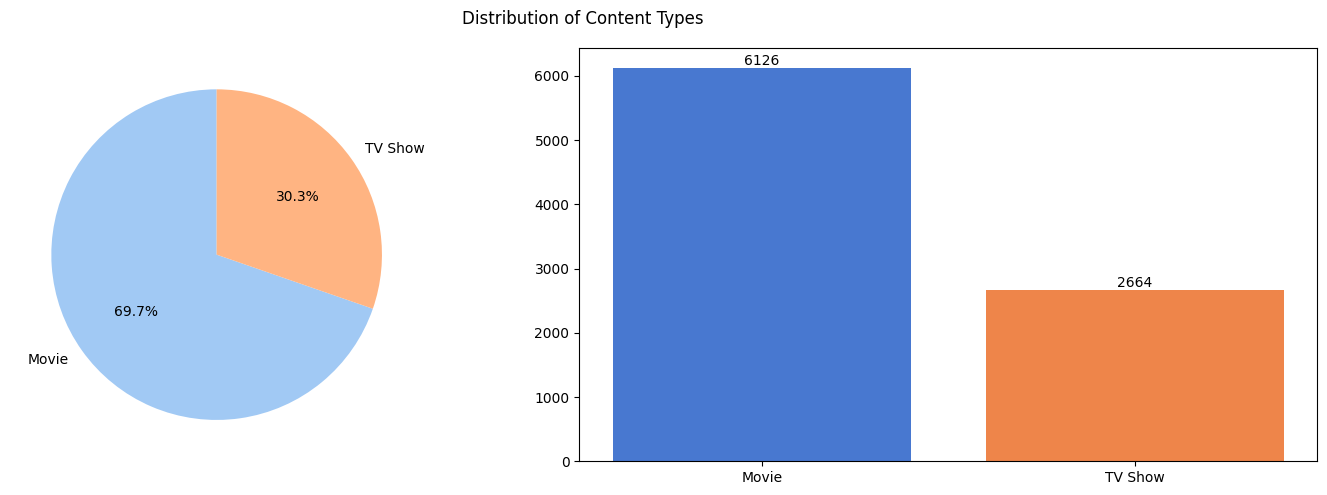

In [ ]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (15, 5))
axs1.pie(data1['type'].value_counts(), labels=data1['type'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

bars = axs2.bar(data1['type'].value_counts().index, data1['type'].value_counts(), color=sns.color_palette('muted'))
for bar in bars:
    yval = bar.get_height()
    axs2.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.suptitle('Distribution of Content Types', fontsize=12)
plt.tight_layout()

plt.show()

**What is the trend of content added to Netflix over the years?**

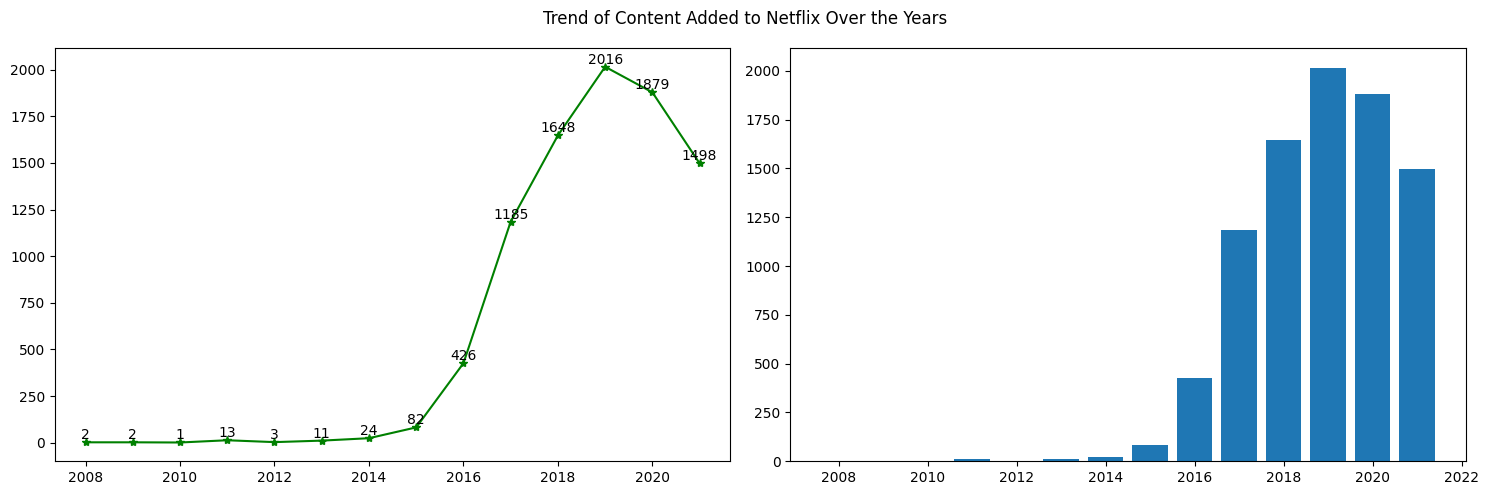

In [ ]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (15, 5))
line = axs1.plot(data1['year_added'].value_counts().sort_index().index, data1['year_added'].value_counts().sort_index(), marker='*', linestyle='-', color='green')
bars = axs2.bar(data1['year_added'].value_counts().index, data1['year_added'].value_counts())
for x, y in zip(data1['year_added'].value_counts().sort_index().index, data1['year_added'].value_counts().sort_index()):
    axs1.text(x, y, str(y), ha='center', va='bottom', fontsize=10)
plt.suptitle('Trend of Content Added to Netflix Over the Years', fontsize=12)
plt.tight_layout()
plt.show()

**Which countries produce the most content on Netflix?**


In [ ]:
content_df = data2.groupby('List_of_Countries')['title'].nunique().reset_index().sort_values('title', ascending = False).reset_index().drop('index', axis = 1)
content_df = content_df[content_df['List_of_Countries']!= "Unknown"].head(10)
content_df.columns = ['Country', 'Count']
content_df

,Country,Count
0,United States,3680
1,India,1046
3,United Kingdom,803
4,Canada,445
5,France,393
6,Japan,316
7,Spain,232
8,South Korea,231
9,Germany,226
10,Mexico,169


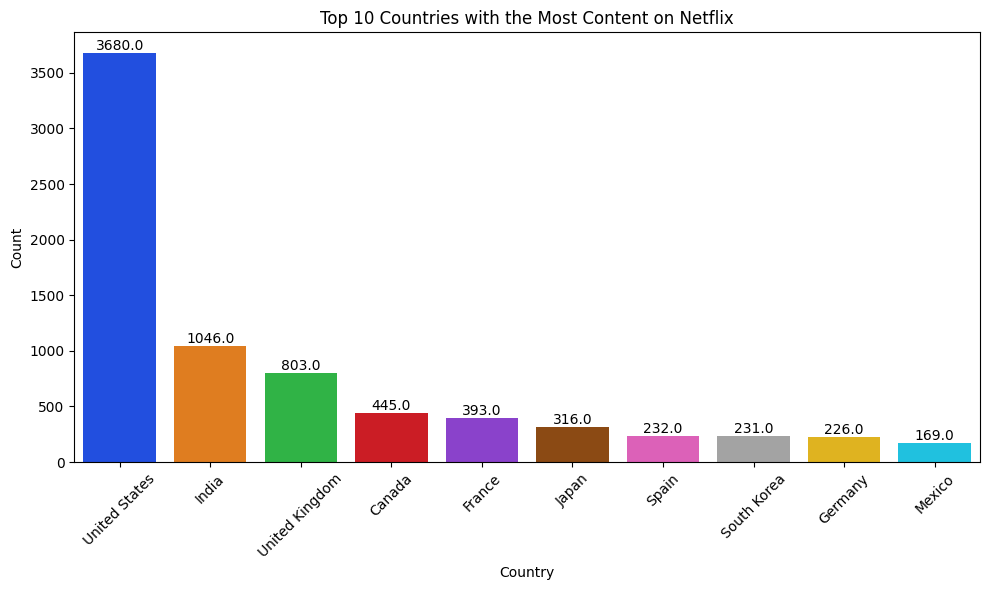

In [ ]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=content_df, x='Country', y='Count', palette='bright')
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height()}',  # The value
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center',
        va='bottom',
        fontsize=10
    )


plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with the Most Content on Netflix')
plt.xticks(rotation=45)
plt.tight_layout()

**How does the distribution of content vary by rating?**


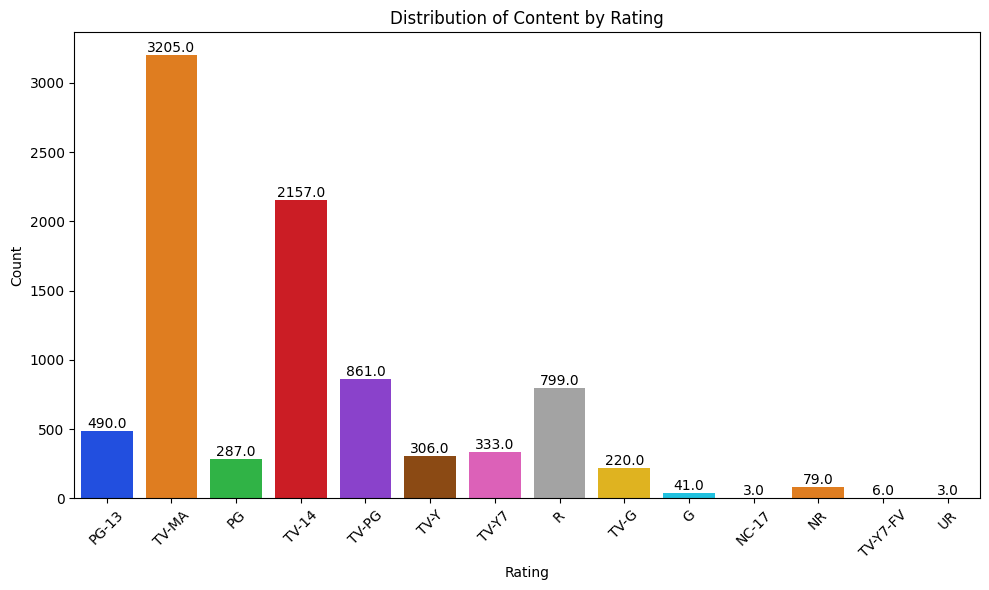

In [ ]:
plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=data1, x='rating', palette='bright')
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height()}',  # The value
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Content by Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**What is the most frequent content duration for movies and TV shows?**

In [ ]:
data1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,movie_minutes,tv_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,90.0,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,NaN,2.0


In [ ]:
movie_df = data1.groupby(data1['type'] == 'Movie')['movie_minutes'].value_counts().reset_index()
movie_df = movie_df.drop('type', axis = 1)
movie_df.head(10)

,movie_minutes,count
0,90.0,152
1,97.0,146
2,93.0,146
3,94.0,146
4,91.0,144
5,95.0,137
6,96.0,130
7,92.0,129
8,102.0,122
9,98.0,120


In [ ]:
season_df = data1.groupby(data1['type'] == 'TV Show')['tv_season'].value_counts().reset_index()
season_df = season_df.drop('type', axis = 1)
season_df.head(10)

,tv_season,count
0,1.0,1791
1,2.0,421
2,3.0,198
3,4.0,94
4,5.0,64
5,6.0,33
6,7.0,23
7,8.0,17
8,9.0,9
9,10.0,6


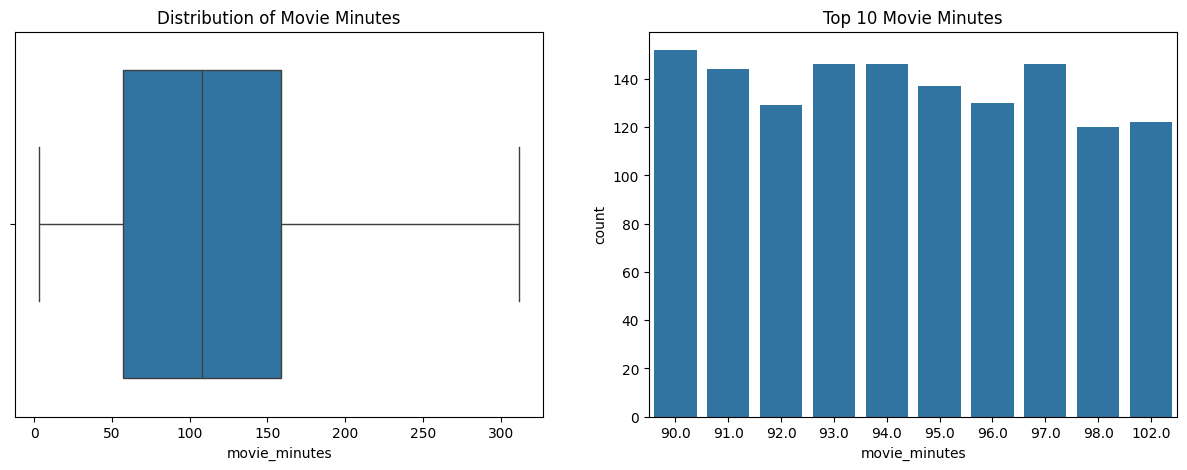

In [ ]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(data = movie_df, x = 'movie_minutes', ax = axs1)
axs1.set_title('Distribution of Movie Minutes')
sns.barplot(x = movie_df['movie_minutes'][:10], y = movie_df['count'][:10], ax = axs2)
axs2.set_title('Top 10 Movie Minutes')
plt.show()

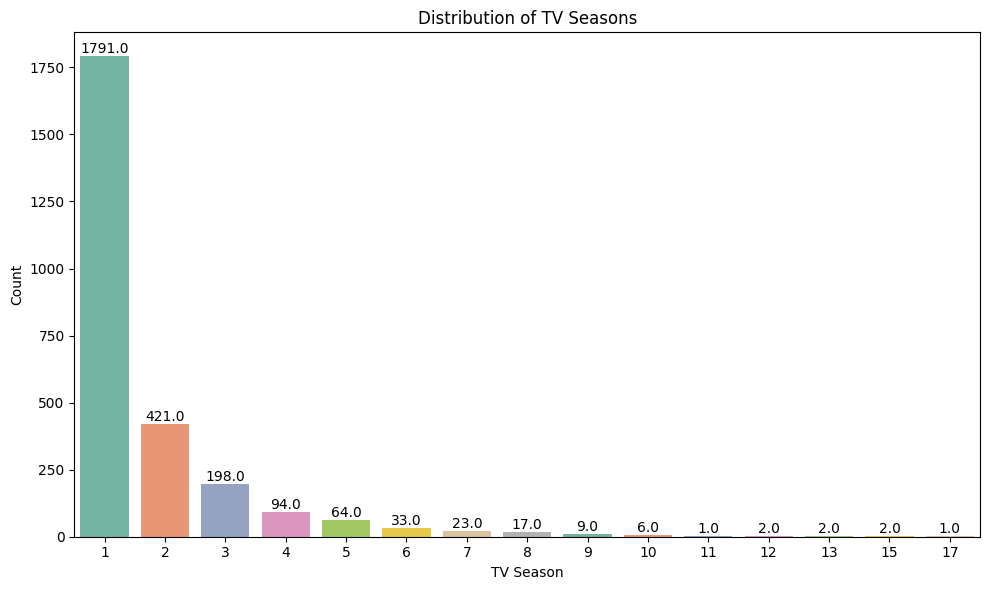

In [ ]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x = season_df['tv_season'], y = season_df['count'], palette='Set2')
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height()}',  # The value
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center',
        va='bottom',
        fontsize=10
    )
x_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17]
barplot.set_xticklabels(x_labels)
plt.xlabel('TV Season')
plt.ylabel('Count')
plt.title('Distribution of TV Seasons')
plt.tight_layout()
plt.show()

**Which directors have the highest number of shows or movies on Netflix?**


In [ ]:
data2.head(2)

,type,title,List_of_Directors,List_of_Actors,List_of_Countries,List_of_Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries
1,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows


In [ ]:
dir_no = data2.groupby('List_of_Directors')['title'].nunique().reset_index().sort_values('title', ascending = False).reset_index().drop('index', axis = 1)
dir_no = dir_no[dir_no['List_of_Directors']!= "Unknown"].head(10)
dir_no.columns = ['Director', 'Count']
dir_no

,Director,Count
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


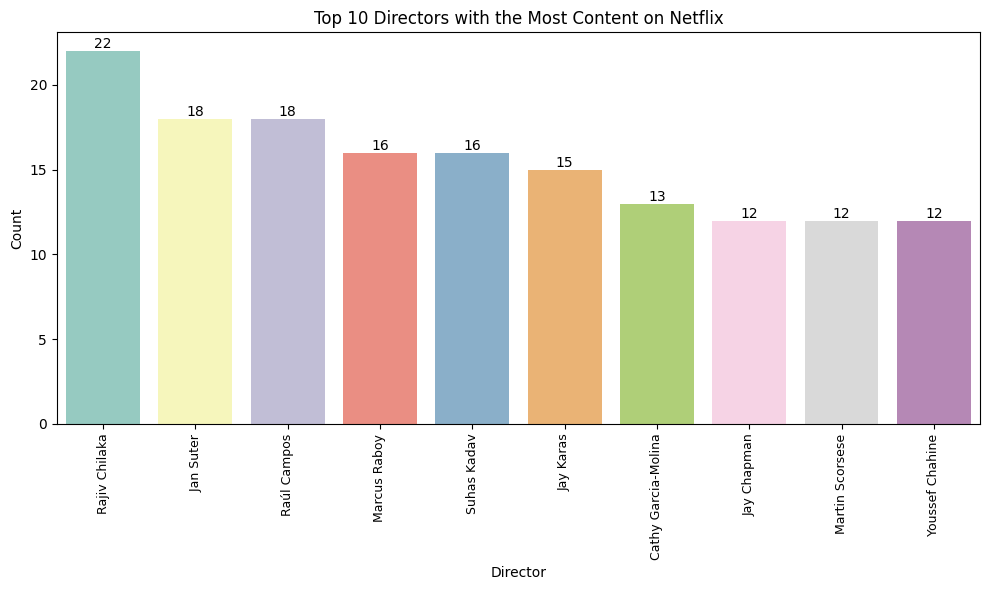

In [ ]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x = dir_no['Director'], y = dir_no['Count'], palette="Set3")
for bar in barplot.patches:
    yval = int(bar.get_height())
    barplot.annotate(
        f'{yval}',  # The value
        (bar.get_x() + bar.get_width() / 2., yval),  # Position
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors with the Most Content on Netflix')
plt.xticks(rotation=90, fontsize=9)
plt.tight_layout()
plt.show()

**What are the most common genres on Netflix?**


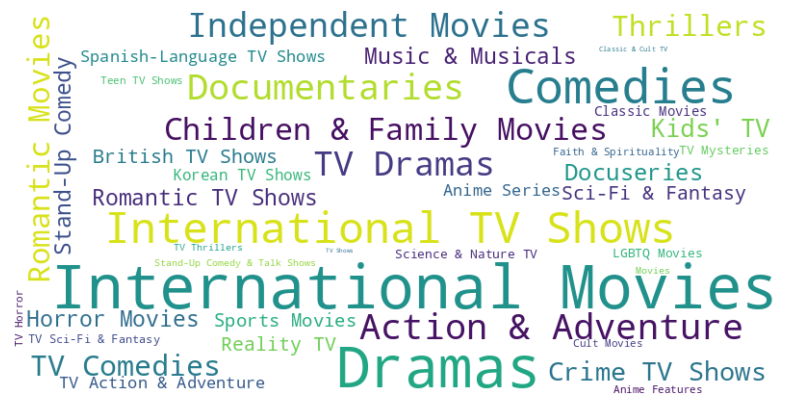

In [ ]:
gen_df = data2.groupby('List_of_Genres')['title'].nunique().reset_index().sort_values('title', ascending = False).reset_index().drop('index', axis = 1)
gen_df.set_index('List_of_Genres').to_dict()['title']
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(gen_df.set_index('List_of_Genres').to_dict()['title'])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**What is the distribution of content release years for Netflix shows and movies?**



In [ ]:
release_df = data1.groupby('type')['release_year'].value_counts().reset_index()
release_df

,type,release_year,count
0,Movie,2018,767
1,Movie,2017,765
2,Movie,2016,658
3,Movie,2019,633
4,Movie,2020,517
...,...,...,...
114,TV Show,1977,1
115,TV Show,1979,1
116,TV Show,1981,1
117,TV Show,1985,1


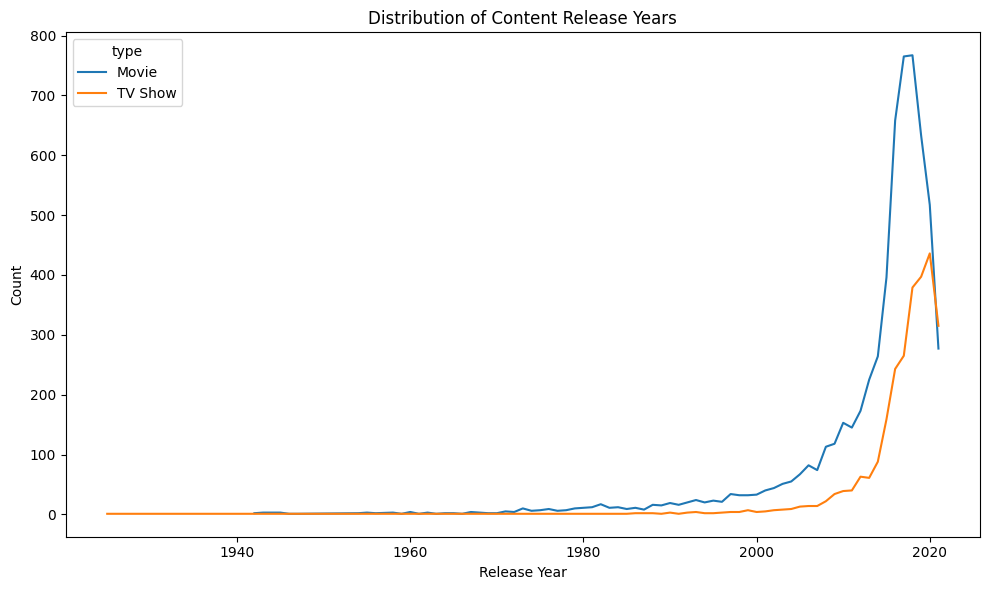

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = release_df, x = 'release_year', y = 'count', hue = 'type')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Content Release Years')
plt.tight_layout()
plt.show()

**Which actors or actresses appear the most in Netflix content?**

In [ ]:
act_df = data2.groupby('List_of_Actors')['title'].nunique().reset_index().sort_values('title', ascending = False).reset_index().drop('index', axis = 1)
act_df = act_df[act_df['List_of_Actors']!= "Unknown"].head(10)
act_df.columns = ['Artist', 'Movies']
act_df

,Artist,Movies
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28
5,Om Puri,27
6,Shah Rukh Khan,26
7,Rajesh Kava,26
8,Boman Irani,25
9,Yuki Kaji,25
10,Paresh Rawal,25


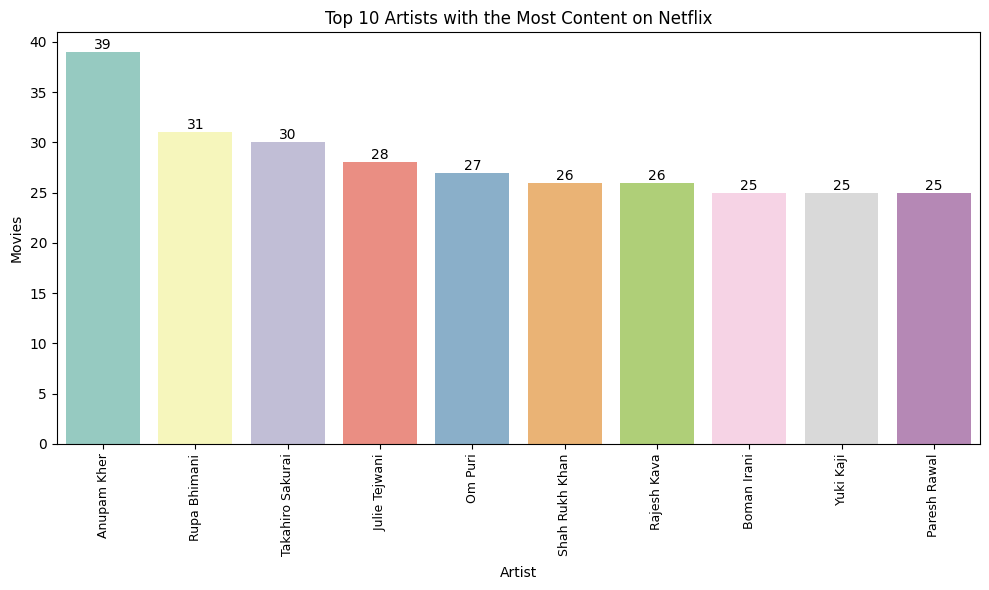

In [ ]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x = act_df['Artist'], y = act_df['Movies'], palette="Set3")
for bar in barplot.patches:
    yval = int(bar.get_height())
    barplot.annotate(
        f'{yval}',  # The value
        (bar.get_x() + bar.get_width() / 2., yval),  # Position
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.xlabel('Artist')
plt.ylabel('Movies')
plt.title('Top 10 Artists with the Most Content on Netflix')
plt.xticks(rotation=90, fontsize=9)
plt.tight_layout()
plt.show()

**How does the type of content vary by genre?**

In [ ]:
data2.head()

,type,title,List_of_Directors,List_of_Actors,List_of_Countries,List_of_Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries
1,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows
2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas
3,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries
4,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows


In [ ]:
movie_type_df = data2[data2['type'] == 'Movie'].groupby(['List_of_Genres'])['title'].nunique().sort_values(ascending = False).reset_index()
movie_type_df = movie_type_df.set_index('List_of_Genres').to_dict()['title']
tv_type_df = data2[data2['type'] == 'TV Show'].groupby(['List_of_Genres'])['title'].nunique().sort_values(ascending = False).reset_index()
tv_type_df = tv_type_df.set_index('List_of_Genres').to_dict()['title']

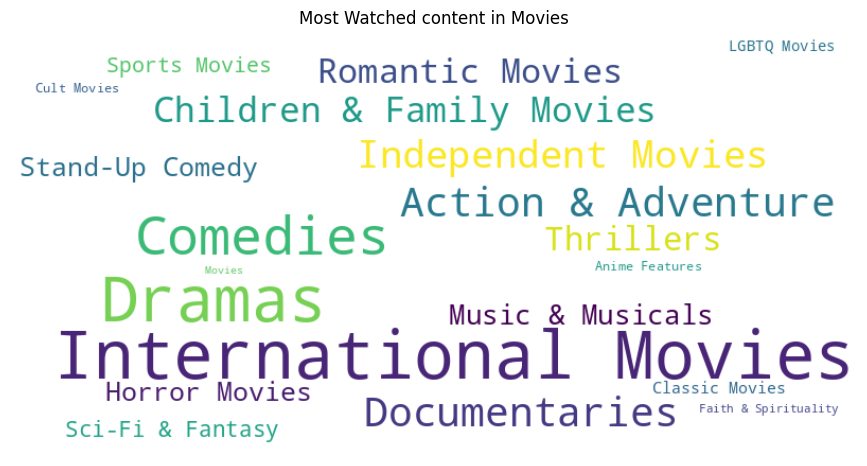

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movie_type_df)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Watched content in Movies")
plt.tight_layout()
plt.axis('off')
plt.show()

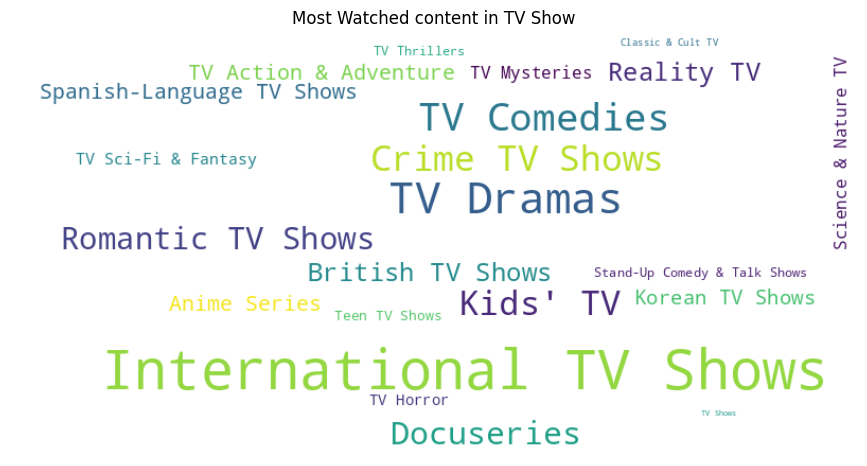

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tv_type_df)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Watched content in TV Show")
plt.tight_layout()
plt.axis('off')
plt.show()

**Is there a pattern in the release year of content across different genres?**


In [ ]:
release_genre_df = pd.merge(data1[['title', 'release_year']], data2[['title', 'List_of_Genres']], on = 'title', how = 'inner')
release_genre_df.head()

,title,release_year,List_of_Genres
0,Dick Johnson Is Dead,2020,Documentaries
1,Blood & Water,2021,International TV Shows
2,Blood & Water,2021,TV Dramas
3,Blood & Water,2021,TV Mysteries
4,Blood & Water,2021,International TV Shows


In [ ]:
release_pattern = release_genre_df.groupby(['List_of_Genres', 'release_year'])['title'].nunique().reset_index()
release_pattern

,List_of_Genres,release_year,title
0,Action & Adventure,1956,1
1,Action & Adventure,1960,2
2,Action & Adventure,1961,1
3,Action & Adventure,1962,1
4,Action & Adventure,1963,1
...,...,...,...
1186,Thrillers,2017,68
1187,Thrillers,2018,83
1188,Thrillers,2019,71
1189,Thrillers,2020,45


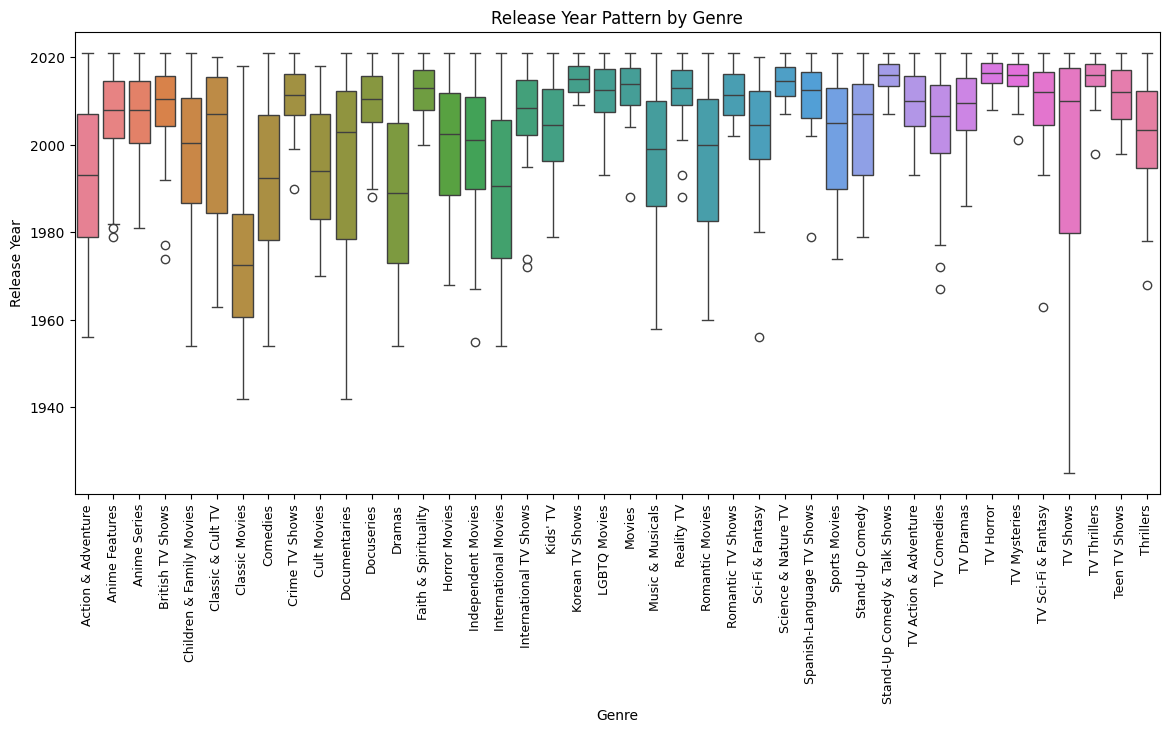

In [ ]:
custom_val = list(release_pattern.groupby('List_of_Genres')['title'].nunique().values)
plt.figure(figsize=(14, 6))
sns.boxplot(data = release_pattern, x = 'List_of_Genres', y = 'release_year', hue = 'List_of_Genres')
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.title('Release Year Pattern by Genre')
plt.xticks(rotation=90, fontsize=9)
plt.show()

**The best month to release the Tv-show**

In [ ]:
data1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,movie_minutes,tv_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,90.0,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,NaN,2.0


In [ ]:
df_month_tv = data1[data1['type'] == 'TV Show']['month_added'].value_counts().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_month_tv['month_added'] = pd.Categorical(df_month_tv['month_added'], categories = month_order, ordered = True)
df_month_tv = df_month_tv.sort_values('month_added').reset_index().drop('index', axis = 1)
df_month_tv

,month_added,count
0,January,192
1,February,180
2,March,213
3,April,214
4,May,193
5,June,236
6,July,262
7,August,236
8,September,251
9,October,215


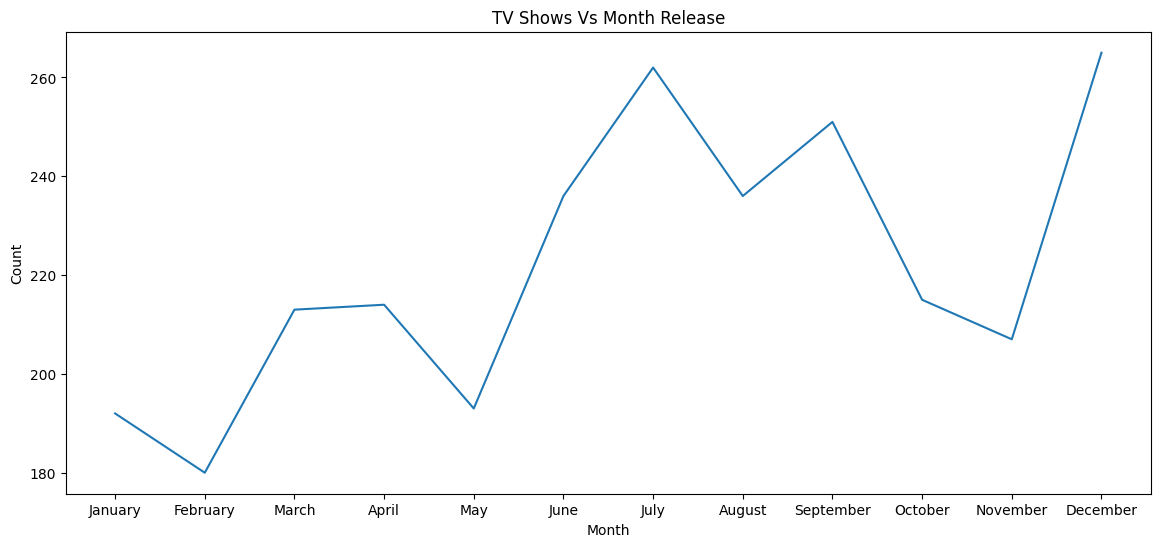

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data = df_month_tv, x = 'month_added', y = 'count')
plt.title("TV Shows Vs Month Release")
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

**The best month to release the Movie**

In [ ]:
df_month_movie = data1[data1['type'] == 'Movie']['month_added'].value_counts().reset_index()
df_month_movie['month_added'] = pd.Categorical(df_month_movie['month_added'], categories = month_order, ordered = True)
df_month_movie = df_month_movie.sort_values('month_added').reset_index()
df_month_movie = df_month_movie.drop('index', axis = 1)
df_month_movie

,month_added,count
0,January,545
1,February,382
2,March,528
3,April,549
4,May,439
5,June,492
6,July,565
7,August,518
8,September,518
9,October,545


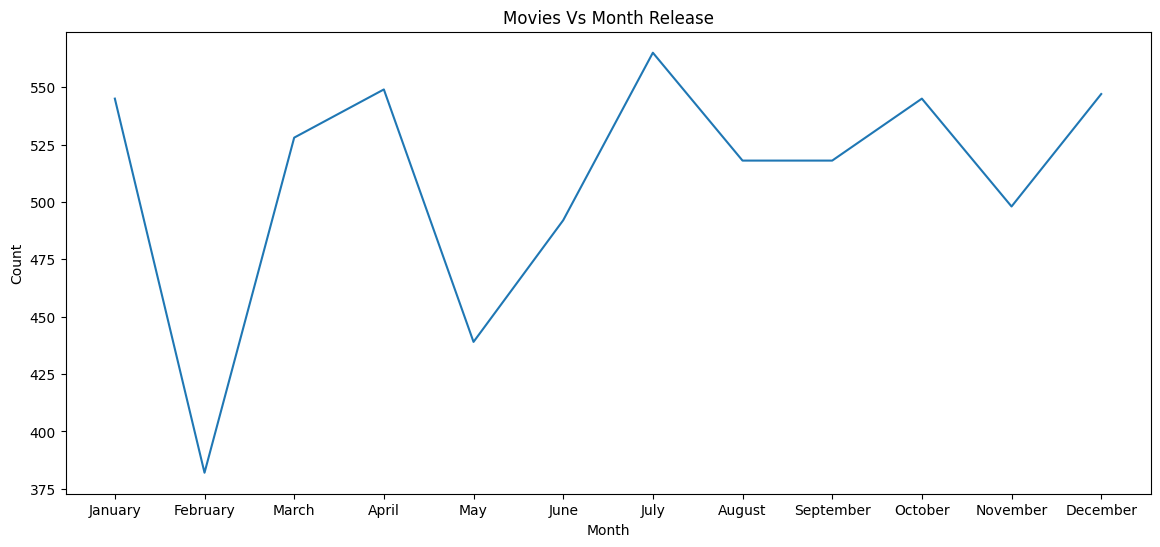

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data = df_month_movie, x = 'month_added', y = 'count')
plt.title("Movies Vs Month Release")
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()